In [194]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [195]:
df = pd.read_csv("/Users/jay/Desktop/Personal-Projects/dataset/diamond/diamonds.csv")
df2 = pd.read_csv("/Users/jay/Desktop/Personal-Projects/dataset/diamond/new-diamonds.csv")

In [196]:
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [197]:
df.shape

(50000, 8)

In [198]:
import missingno as msno

In [199]:
df = df.drop(columns = 'Unnamed: 0')

In [200]:
df.shape

(50000, 7)

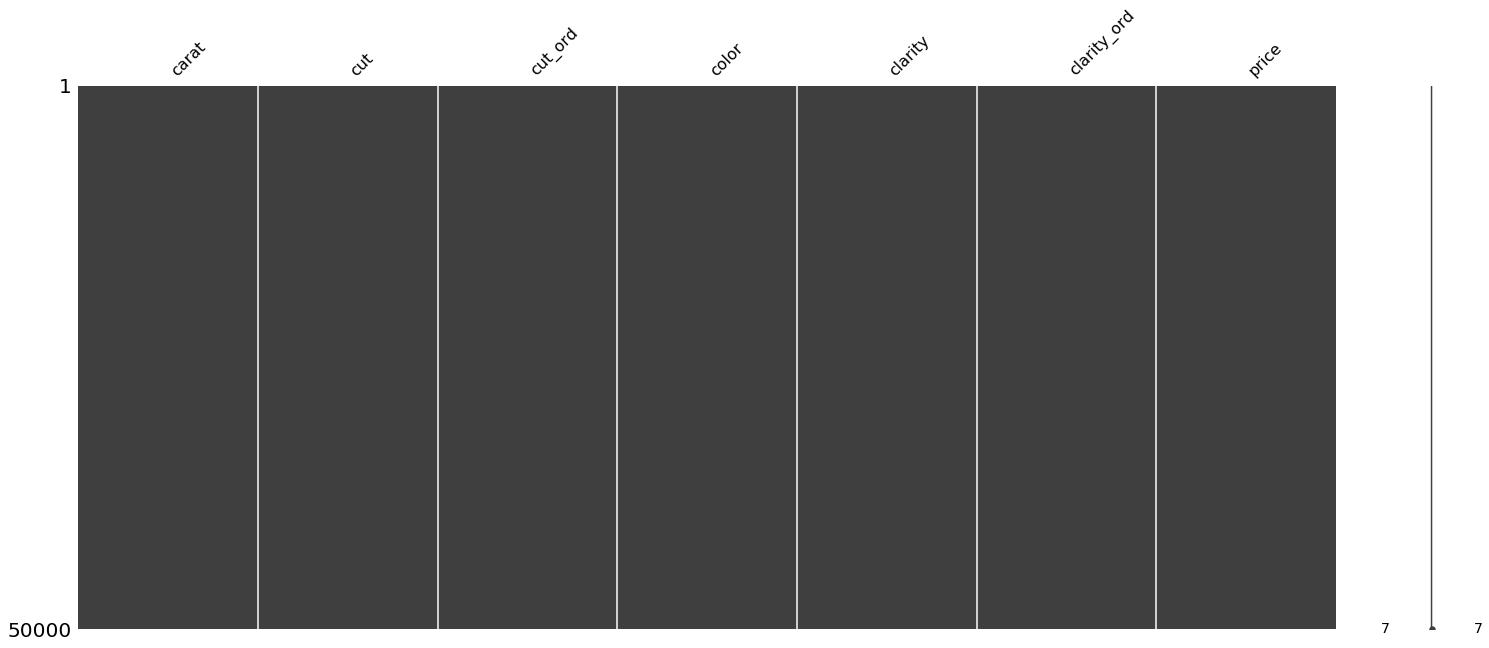

In [201]:
msno.matrix(df)

In [202]:
df2.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [203]:
df2 = df2.drop(columns = 'Unnamed: 0')

In [204]:
df2.shape

(3000, 6)

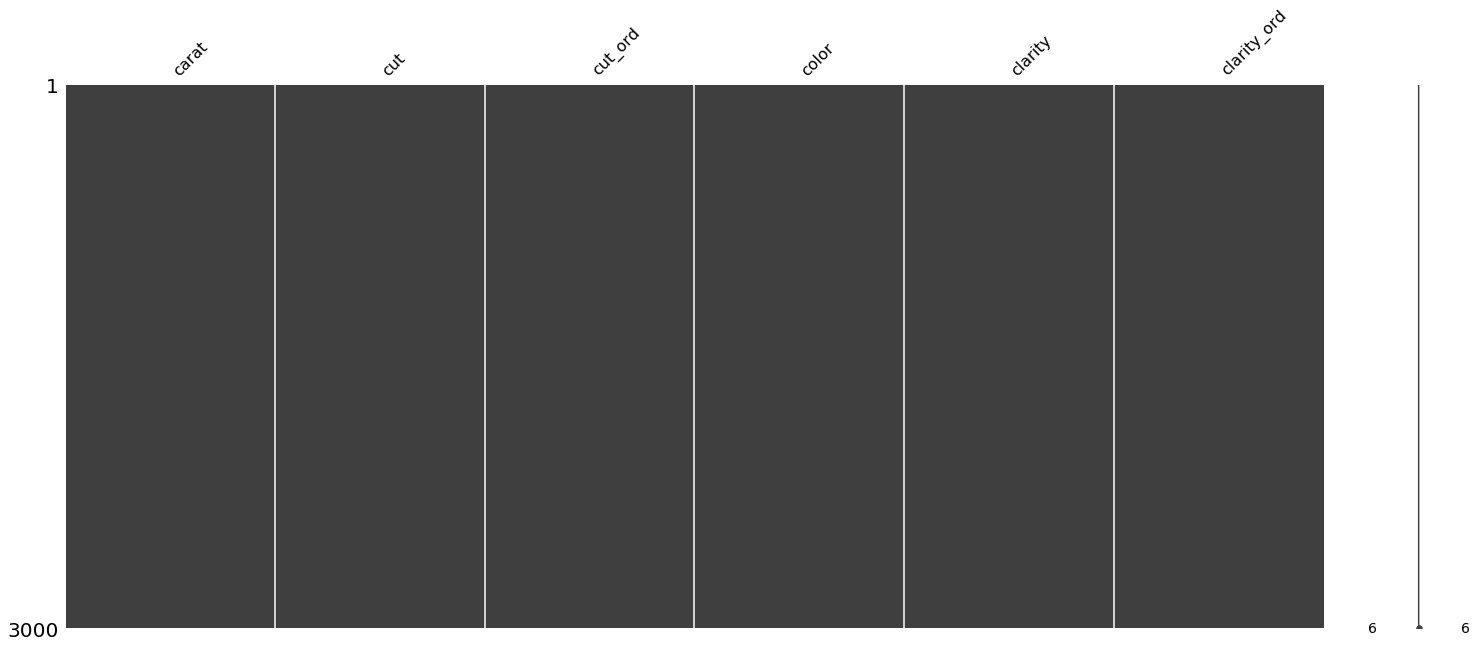

In [205]:
msno.matrix(df2)

## Linear Regerssion

In [206]:
feature = df[['carat', 'cut_ord', 'clarity_ord']]

In [207]:
target = df.price

In [208]:
regression = LinearRegression()

In [209]:
model = regression.fit(feature, target)

In [210]:
model.intercept_

-5255.223146477377

In [211]:
model.coef_

array([8363.41665765,  160.37858283,  457.80181294])

In [212]:
a = target[0]*1000
print(a)

1749000


In [213]:
b = model.predict(feature)[0]*1000
print(b)

1482840.9319922174


In [214]:
result = a - b
print(result)

266159.06800778257


### One hot encoding

In [215]:
df['color'].value_counts()

G    10448
E     9056
F     8843
H     7704
D     6268
I     5076
J     2605
Name: color, dtype: int64

In [216]:
df['color_G'] = df['color'] == 'G'
df['color_E'] = df['color'] == 'E'
df['color_F'] = df['color'] == 'F'
df['color_H'] = df['color'] == 'H'
df['color_D'] = df['color'] == 'D'
df['color_I'] = df['color'] == 'I'
df['color_J'] = df['color'] == 'J'

In [217]:
df.shape

(50000, 14)

In [218]:
df.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price,color_G,color_E,color_F,color_H,color_D,color_I,color_J
0,0.51,Premium,4,F,VS1,4,1749,False,False,True,False,False,False,False
1,2.25,Fair,1,G,I1,1,7069,True,False,False,False,False,False,False
2,0.70,Very Good,3,E,VS2,5,2757,False,True,False,False,False,False,False
3,0.47,Good,2,F,VS1,4,1243,False,False,True,False,False,False,False
4,0.30,Ideal,5,G,VVS1,7,789,True,False,False,False,False,False,False


In [219]:
feature1 = df[['carat', 'cut_ord', 'clarity_ord',
              'color_G', 'color_E', 'color_F',
              'color_H', 'color_D', 'color_I', 'color_J']]

In [220]:
target = df.price

In [221]:
model = regression.fit(feature1, target)

In [222]:
model.intercept_

-5865.53820777658

In [223]:
model.coef_

array([ 8749.68393954,   158.65756296,   484.54502494,   315.67703901,
         588.64160964,   485.00628705,  -165.20396861,   791.99244945,
        -585.71804128, -1430.39537525])

In [224]:
a = target[0]*1000
print(a)

1749000


In [225]:
b = model.predict(feature1)[0]*1000
print(b)

1654617.2400361756


In [226]:
result = a - b
print(result)

94382.75996382441


## Linear Regerssion: Polynomial Features

In [227]:
from sklearn.preprocessing import PolynomialFeatures

In [228]:
feature2 = df[['carat', 'cut_ord', 'clarity_ord']]
target = df.price

In [229]:
interaction = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = True)
features_interaction = interaction.fit_transform(feature2)

In [230]:
regression = LinearRegression()

In [231]:
model = regression.fit(features_interaction, target)

In [232]:
model.intercept_

-2715.485565927317

In [233]:
model.coef_

array([4936.85097188,  -53.71174324,  -14.43108578,  327.06310663,
        720.03851331,   11.45557156,  -32.30862073])

In [234]:
a = target[0]*1000
print(a)

1749000


In [235]:
b = model.predict(features_interaction)[0]*1000
print(b)

1585475.218171854


In [236]:
result = a - b
print(result)

163524.78182814596


## Ridge Regression

In [237]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [238]:
feature3 = df[['carat', 'cut_ord', 'clarity_ord',
              'color_G', 'color_E', 'color_F',
              'color_H', 'color_D', 'color_I', 'color_J']]
target = df.price

In [239]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(feature3)

In [240]:
regression = Ridge(alpha = 0.5)

In [241]:
model = regression.fit(features_standardized, target)

In [242]:
from sklearn.linear_model import RidgeCV

In [243]:
regr_cv = RidgeCV(alphas=[0.1,1.0,10.0], cv = 5)

In [244]:
model_cv = regr_cv.fit(features_standardized, target)

In [245]:
model_cv.coef_

array([4152.89185875,  177.21761625,  806.9785624 ,   55.07941891,
        157.27969043,  116.29021168, -124.69104961,  202.56087868,
       -231.30127157, -357.89756174])

In [246]:
model_cv.intercept_

3939.103499999999

In [247]:
model_cv.alpha_

1.0

In [248]:
b = model.predict(features_standardized)[0]*1000
print(b)

1654645.596242824


In [249]:
b2 = model_cv.predict(features_standardized)[0]*1000
print(b2)

1654673.9515745759


In [250]:
result = a - b
result2 = a - b2
print(result)
print(result2)

94354.4037571759
94326.04842542415


## LASSO

In [251]:
from sklearn.linear_model import Lasso

In [252]:
feature4 = df[['carat', 'cut_ord', 'clarity_ord',
              'color_G', 'color_E', 'color_F',
              'color_H', 'color_D', 'color_I', 'color_J']]
target = df.price

In [253]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(feature4)

In [254]:
regression = Lasso(alpha=0.5)

In [255]:
model = regression.fit(features_standardized, target)

In [256]:
model.coef_

array([4151.73540775,  176.73650786,  806.20178663,   -0.        ,
        104.43633421,   64.00986332, -173.24543613,  156.97726009,
       -271.75154656, -387.48228009])

In [257]:
from sklearn.linear_model import LassoCV

In [258]:
lasso_cv = LassoCV(alphas=[0.1,1.0,10.0], cv=5)
model_cv = lasso_cv.fit(features_standardized, target)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 862302235.7807693, tolerance: 79833681.46653874
  positive)


In [259]:
model_cv.coef_

array([4152.75621791,  177.12961217,  806.87225799,   76.1571062 ,
        177.20498435,  136.03058892, -105.84946753,  219.65025221,
       -215.52260712, -346.26043549])

In [260]:
model_cv.alpha_

0.1

In [261]:
a = target[0]*1000
print(a)

1749000


In [262]:
b = model.predict(features_standardized)[0]*1000
print(b)
b2 = model_cv.predict(features_standardized)[0]*1000
print(b2)

1654280.9106904753
1654596.805126682


In [263]:
result = a - b
result2 = a - b2
print(result)
print(result2)

94719.08930952474
94403.19487331808


- It seems RidgeCV is the best method to fit the model

## Predict Diamond Price based on regression analysis model

In [264]:
df2.head()

,carat,cut,cut_ord,color,clarity,clarity_ord
0,1.22,Premium,4,G,SI1,3
1,1.01,Good,2,G,VS2,5
2,0.71,Very Good,3,I,VS2,5
3,1.01,Ideal,5,D,SI2,2
4,0.27,Ideal,5,H,VVS2,6


In [265]:
df2['color'].value_counts()

G    654
E    569
F    522
H    438
D    381
I    276
J    160
Name: color, dtype: int64

In [266]:
df2['color_G'] = df2['color'] == 'G'
df2['color_E'] = df2['color'] == 'E'
df2['color_F'] = df2['color'] == 'F'
df2['color_H'] = df2['color'] == 'H'
df2['color_D'] = df2['color'] == 'D'
df2['color_I'] = df2['color'] == 'I'
df2['color_J'] = df2['color'] == 'J'

In [267]:
df2.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,color_G,color_E,color_F,color_H,color_D,color_I,color_J
0,1.22,Premium,4,G,SI1,3,True,False,False,False,False,False,False
1,1.01,Good,2,G,VS2,5,True,False,False,False,False,False,False
2,0.71,Very Good,3,I,VS2,5,False,False,False,False,False,True,False
3,1.01,Ideal,5,D,SI2,2,False,False,False,False,True,False,False
4,0.27,Ideal,5,H,VVS2,6,False,False,False,True,False,False,False


In [271]:
df2[['color_G', 'color_E', 'color_F','color_H', 'color_D', 'color_I', 'color_J']] = df2[['color_G', 'color_E', 'color_F','color_H', 'color_D', 'color_I', 'color_J']].astype(int)

In [272]:
df2.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,color_G,color_E,color_F,color_H,color_D,color_I,color_J
0,1.22,Premium,4,G,SI1,3,1,0,0,0,0,0,0
1,1.01,Good,2,G,VS2,5,1,0,0,0,0,0,0
2,0.71,Very Good,3,I,VS2,5,0,0,0,0,0,1,0
3,1.01,Ideal,5,D,SI2,2,0,0,0,0,1,0,0
4,0.27,Ideal,5,H,VVS2,6,0,0,0,1,0,0,0


In [ ]:
# array([4152.89185875,  177.21761625,  806.9785624 ,   55.07941891,
#         157.27969043,  116.29021168, -124.69104961,  202.56087868,
#        -231.30127157, -357.89756174])

# Intercept: 3939.103499999999

In [273]:
df2['price'] = 3939.103499999999 + df2['carat']*4152.89185875 + df2['cut_ord']*177.21761625 + df2['clarity_ord']*806.9785624+ df2['color_G']*55.07941891 + df2['color_E']*157.27969043 + df2['color_F']*116.29021168
+ df2['color_H']*-124.69104961 + df2['color_D']*202.56087868 + df2['color_I']*-231.30127157 + df2['color_J']*-357.89756174
    
    

0         0.000000
1         0.000000
2      -231.301272
3       202.560879
4      -124.691050
5         0.000000
6         0.000000
7       202.560879
8         0.000000
9         0.000000
10     -124.691050
11        0.000000
12      202.560879
13        0.000000
14        0.000000
15     -124.691050
16        0.000000
17     -231.301272
18        0.000000
19     -357.897562
20        0.000000
21        0.000000
22     -231.301272
23        0.000000
24     -231.301272
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
           ...    
2970      0.000000
2971      0.000000
2972      0.000000
2973      0.000000
2974   -231.301272
2975      0.000000
2976      0.000000
2977      0.000000
2978   -357.897562
2979   -124.691050
2980      0.000000
2981      0.000000
2982   -357.897562
2983   -231.301272
2984    202.560879
2985   -231.301272
2986   -124.691050
2987      0.000000
2988      0.000000
2989      0.000000
2990    202.560879
2991   -124.

In [274]:
df2.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,color_G,color_E,color_F,color_H,color_D,color_I,color_J,price
0,1.22,Premium,4,G,SI1,3,1,0,0,0,0,0,0,12190.517139
1,1.01,Good,2,G,VS2,5,1,0,0,0,0,0,0,12577.931741
2,0.71,Very Good,3,I,VS2,5,0,0,0,0,0,1,0,11454.202380
3,1.01,Ideal,5,D,SI2,2,0,0,0,0,1,0,0,10633.569483
4,0.27,Ideal,5,H,VVS2,6,0,0,0,1,0,0,0,10788.343758


In [277]:
df2['price'].sum()

33964351.81697777